In [1]:
include("/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/Solvers.jl")
include("/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/UsefulFunctions.jl")
include("/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

In [2]:
using DifferentialEquations

In [93]:
function CorrelationMatrix_Initpos(p,Δt,N,initial_points,Solver,center)
    M = zeros(length(initial_points[1,:]), N+1)
    for i = 1:length(initial_points[1,:])
        x₀ = initial_points[:,i]
        X = []
        push!(X,LorenzSolutionFixedTimeStep(p, Δt, N, x₀, Solver))
        push!(X,LorenzSolutionFixedTimeStep(p, Δt, N, center, Solver))
        for j = 1:N+1
            M[i,j] = Correlation(X[1][:,j], X[2][:,j])
        end
    end
    return M
end

CorrelationMatrix_Initpos (generic function with 1 method)

In [52]:
# initial conditions
x₀ = [0.0; 
     1.0; 
     0.0]
θ = 10; μ = 28; β = 8/3;
p=[θ,μ,β]
t = 5
Δt = 10^(-4)

0.0001

In [117]:
epsilon_vals = [0.25, 0.5, 1]

3-element Vector{Float64}:
 0.25
 0.5
 1.0

In [133]:
initial_vals = PointsOnSphere(100, 10^(-5), x₀')

3×100 Matrix{Float64}:
 -6.2731e-6    5.61463e-6  -8.38319e-6  …   5.74839e-6  -5.22696e-6
  0.999995     0.999996     0.999997        1.0          0.999993
  6.25389e-6  -7.21054e-6   4.64975e-6     -8.01983e-6  -4.8854e-6

In [77]:
length(initial_vals[1,:])

100

In [139]:
CorrelationMatrix_Initpos(p,Δt,Integer(30/Δt),initial_vals,RK4,x₀)

100×300001 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.668915  0.668452  0.667989
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.475757  0.475191  0.474625
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.636246  0.635835  0.635424
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.996356  0.996368  0.99638
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.742003  0.741571  0.741139
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.516486  0.515952  0.515418
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.485958  0.4853    0.484641
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.437805  0.437381  0.436957
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.649473  0.648937  0.648401
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.983075  0.983011  0.982946
 ⋮                        ⋮                   ⋱                      ⋮
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.335138  0.334989  0.334841
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [140]:
N=Integer(30/Δt)
Mavg = zeros(length(epsilon_vals),N+1)
l=100

100

In [141]:
for k = 1:length(epsilon_vals)
    print(k)
    initial_vals=PointsOnSphere(l, epsilon_vals[k], x₀')
    M = CorrelationMatrix_Initpos(p,Δt,N,initial_vals,RK4,x₀);
    Mavg[k,:] = sum(M,dims=1)/l
end

12

3

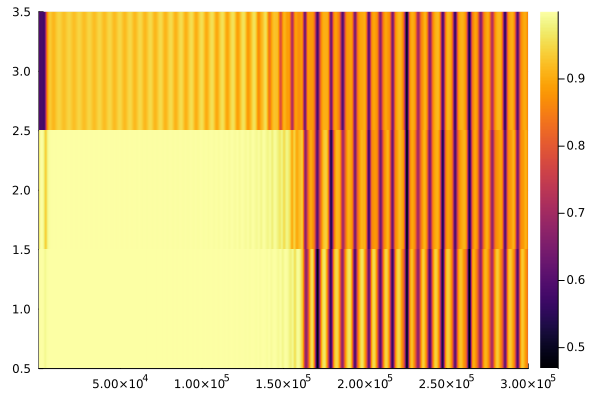

In [145]:
heatmap(Mavg)